# Get the filters data

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk')

In [2]:
bggdata_df = pd.read_pickle('datasources/BGG_FINAL.pkl')

In [4]:
bggdata_df.columns

Index(['game_rank', 'geek_rating', 'avg_rating', 'num_raters', 'game_name',
       'game_year', 'bgg_url', 'reimpl0', 'reimpl0href', 'ranks', 'avgrating',
       'titleinfo', 'gameplayinfo', 'gamecredits', 'ftr_title', 'ftr_descr',
       'gamedscription', 'rnkoverall', 'rnkthematic', 'rnkstrategy',
       'shortsummary', 'numplayersmin', 'numplayersmax', 'gamedurmin',
       'gamedurmax', 'agemin', 'gameweight', 'designer', 'artist', 'publisher',
       'gametype', 'gamecategory', 'gamemechanisms', 'gamefamily', 'rnkwar',
       'rnkcustomizable', 'rnkfamily', 'rnkabstract', 'rnkparty',
       'rnkchildren's', 'rnkamiga', 'rnkcommodore64', 'rnkarcade',
       'rnkatariST'],
      dtype='object')

In [5]:
bgg_filters = bggdata_df.copy() # Start with a copy

In [26]:
bgg_filters = bgg_filters[['geek_rating', 'avg_rating', 'num_raters', 'game_name',
       'game_year', 'bgg_url','numplayersmin', 'gamedurmin',
       'gamedurmax', 'agemin']]

In [113]:
bgg_filters.describe()

,geek_rating,avg_rating,num_raters,game_year,numplayersmin,gamedurmin,gamedurmax,agemin
count,18900.000000,18900.000000,18900.000000,18745.000000,18853.000000,18389.000000,5260.000000,17728.000000
mean,5.694298,6.394493,806.959206,2002.284983,2.037235,69.156452,153.671293,10.234713
std,0.367786,0.915001,3322.867565,92.277529,0.676037,484.136927,1745.524924,2.749794
min,5.234000,1.050000,30.000000,-3500.000000,1.000000,1.000000,2.000000,1.000000
25%,5.511000,5.810000,55.000000,2000.000000,2.000000,20.000000,30.000000,8.000000
50%,5.552000,6.420000,118.000000,2010.000000,2.000000,30.000000,60.000000,10.000000
75%,5.692000,7.000000,374.000000,2016.000000,2.000000,60.000000,90.000000,12.000000
max,8.574000,9.690000,94477.000000,2021.000000,10.000000,60000.000000,120000.000000,25.000000


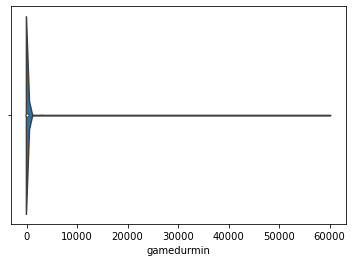

In [114]:
sns.violinplot(bgg_filters['gamedurmin'])
#plt.xlim(-10,2000)

In [122]:
avggamedur = [b if np.isnan(a) else a-b for a,b in zip(list(bgg_filters['gamedurmax']),list(bgg_filters['gamedurmin']))]

In [153]:
min(bgg_filters['gamedurmin'])

1.0

Text(0.5, 0, 'Log (minimum game duration, min)')

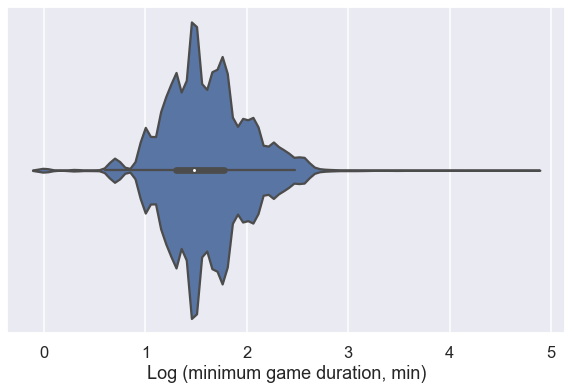

In [168]:
f,a = plt.subplots(1,1,figsize=(10,6))
sns.violinplot(bgg_filters['gamedurmin'].apply(np.log10))
#plt.xlim(-100,1000)
#plt.ylabel('Frequency')
plt.xlabel('Log (minimum game duration, min)')


In [174]:
10**(0.5)

3.1622776601683795

In [182]:
gamedurmin = pd.DataFrame(bgg_filters['gamedurmin'])
gamedurmin.dropna(inplace=True)

(-10.0, 2000.0)

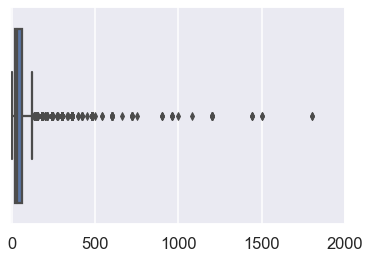

In [187]:
sns.boxplot(gamedurmin)
plt.xlim(-10,2000)

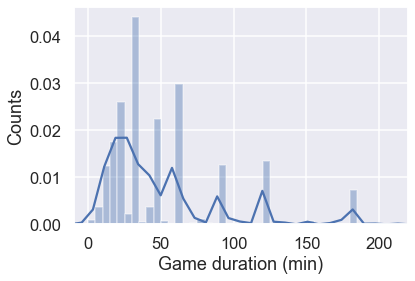

In [242]:
sns.distplot(gamedurmin.loc[gamedurmin['gamedurmin']<1000,'gamedurmin'],bins=range(0,200,5))
plt.xlim(-10,220)
plt.xlabel('Game duration (min)')
plt.ylabel('Counts')
plt.show()

In [257]:
len(bgg_filters.loc[bgg_filters['gamedurmin']>240,'gamedurmin'])/len(bgg_filters)

0.02666666666666667

# Minimum game durations:

### Following groups:
#### <=15min: 15%
#### <=30min: 50%
#### <=60min: 75%
#### <=120min: 90%
#### <=240min: 95%
#### >240min: 5%

- Very short: 1-15 min : 16%
- Short: 15-30 min
- Medium: 30-60 min
- Long: 60-120 min
- Very long: 120-240min
- Ultra long: 240+

In [259]:
bgg_filters.head()

,geek_rating,avg_rating,num_raters,game_name,game_year,bgg_url,numplayersmin,gamedurmin,gamedurmax,agemin
0,8.574,8.83,35235.0,Gloomhaven,2017.0,https://boardgamegeek.com//boardgame/174430/gl...,1.0,60.0,120.0,12.0
1,8.471,8.62,37213.0,Pandemic Legacy: Season 1,2015.0,https://boardgamegeek.com//boardgame/161936/pa...,2.0,60.0,NaN,13.0
2,8.276,8.43,54359.0,Terraforming Mars,2016.0,https://boardgamegeek.com//boardgame/167791/te...,1.0,120.0,NaN,12.0
3,8.276,8.64,12964.0,Brass: Birmingham,2018.0,https://boardgamegeek.com//boardgame/224517/br...,2.0,60.0,120.0,14.0
4,8.221,8.47,20132.0,Through the Ages: A New Story of Civilization,2015.0,https://boardgamegeek.com//boardgame/182028/th...,2.0,120.0,NaN,14.0


In [308]:
nangamemin = bggdata_df.index[bggdata_df['gamedurmin'].isna()]
nangamemin

Int64Index([ 2621,  2823,  3057,  3251,  4578,  5120,  5424,  5822,  6142,
             6175,
            ...
            18540, 18559, 18566, 18576, 18578, 18651, 18715, 18732, 18800,
            18841],
           dtype='int64', length=511)

In [304]:
ngm = [np.nan if a.isna ]

Int64Index([ 2621,  2823,  3057,  3251,  4578,  5120,  5424,  5822,  6142,
             6175,
            ...
            18540, 18559, 18566, 18576, 18578, 18651, 18715, 18732, 18800,
            18841],
           dtype='int64', length=511)

In [313]:
x = [str(a) for a in bgg_filters['gamedurmin']]

In [318]:
y = [float(a) if a!='nan' else np.nan for a in x]

In [323]:
z = [1 for a in y if a==np.nan]

In [326]:
y = pd.DataFrame(y)

In [331]:
sum(y[0].isna())

0